In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_excel(r'C:\Users\HP\Downloads\Daily_Demand_Forecasting_Orders_reg.xls')

In [7]:
data

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [9]:
data.describe(include='all')

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [10]:
data.corr()

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Week of the month,1.000000,-0.207791,0.243472,0.118258,0.256115,0.312767,-0.041582,0.000964,-0.194088,0.392310,0.147086,-0.157059,0.211709
Day of the week,-0.207791,1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,-0.132397,-0.339485,-0.051815,-0.577035,-0.012251,-0.435286
Non-urgent order,0.243472,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.057150,0.246937,0.732357,0.788192,0.132857,0.934518
Urgent order,0.118258,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.011452,0.242268,0.230618,0.660868,0.031260,0.729785
Order type A,0.256115,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,0.064525,-0.151762,0.675328,0.294374,0.230369,0.559735
Order type B,0.312767,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,-0.122432,0.127111,0.592845,0.713674,0.067325,0.900673
Order type C,-0.041582,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,0.007906,0.442404,0.330186,0.718739,0.031053,0.804984
Fiscal sector orders,0.000964,-0.132397,-0.057150,-0.011452,0.064525,-0.122432,0.007906,1.000000,0.197670,0.003523,-0.055066,0.294567,-0.052116
Orders from the traffic controller sector,-0.194088,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,0.197670,1.000000,-0.162309,0.240450,0.231614,0.244712
Banking orders (1),0.392310,-0.051815,0.732357,0.230618,0.675328,0.592845,0.330186,0.003523,-0.162309,1.000000,0.262905,0.221335,0.630365


In [11]:
data.columns

Index(['Week of the month', 'Day of the week', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [14]:
data1 = data[['Non-urgent order','Urgent order','Order type A','Order type B','Order type C','Banking orders (1)','Banking orders (2)','Target (Total orders)']]

In [25]:
variables = data[['Banking orders (1)','Banking orders (2)']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,2.111263,Banking orders (1)
1,2.111263,Banking orders (2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Banking orders (1)'>

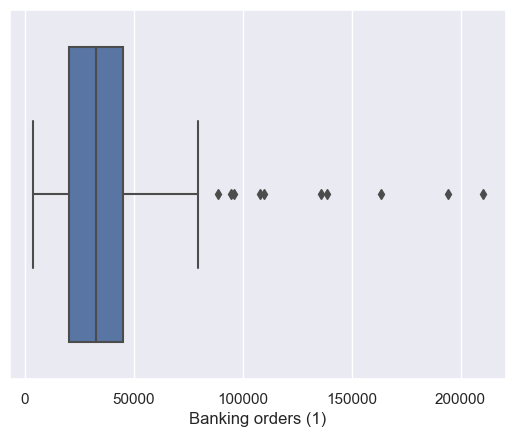

In [26]:
sns.boxplot(data['Banking orders (1)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Banking orders (2)'>

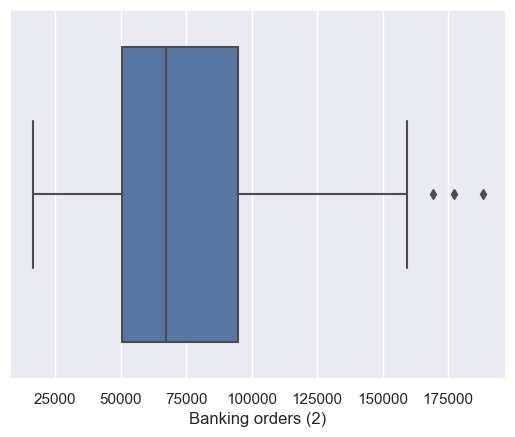

In [27]:
sns.boxplot(data['Banking orders (2)'])

In [34]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-IQR
Upper = q3+IQR

In [35]:
data['Banking orders (1)'] = np.where(data['Banking orders (1)'] > Upper['Banking orders (1)'],Upper['Banking orders (1)'],data['Banking orders (1)'])


In [36]:
data['Banking orders (2)'] = np.where(data['Banking orders (2)'] > Upper['Banking orders (2)'],Upper['Banking orders (2)'],data['Banking orders (2)'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Banking orders (1)'>

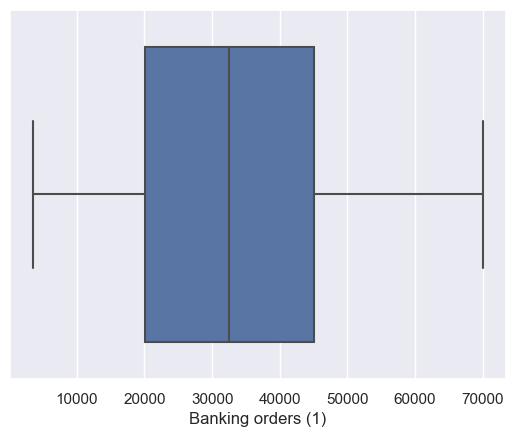

In [37]:
sns.boxplot(data['Banking orders (1)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Banking orders (2)'>

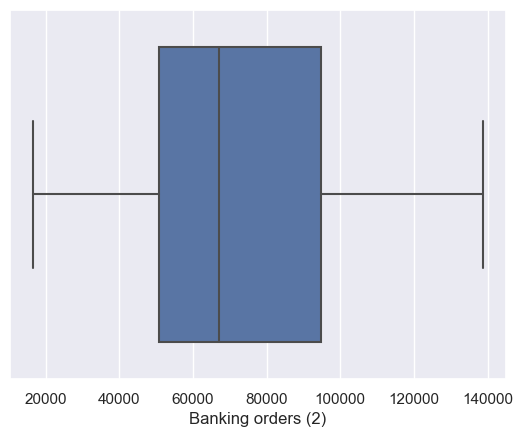

In [38]:
sns.boxplot(data['Banking orders (2)'])

In [39]:
data1

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Banking orders (1),Banking orders (2),Target (Total orders)
0,316.307,223.270,61.543,175.586,302.448,44914,188411,539.577
1,128.633,96.042,38.058,56.037,130.580,21399,89461,224.675
2,43.651,84.375,21.826,25.125,82.461,3452,21305,129.412
3,171.297,127.667,41.542,113.294,162.284,33703,69054,317.120
4,90.532,113.526,37.679,56.618,116.220,19646,16411,210.517
5,110.925,96.360,30.792,50.704,125.868,8773,47522,207.364
6,144.124,118.919,43.304,66.371,153.368,33597,48269,263.043
7,119.379,113.870,38.584,85.961,124.413,26278,56665,248.958
8,218.856,124.381,33.973,148.274,162.044,19461,103376,344.291
9,146.518,101.045,36.399,43.306,168.723,7742,82395,248.428


In [40]:
data.columns

Index(['Week of the month', 'Day of the week', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [50]:
scaler = MinMaxScaler()

In [51]:
data2['Banking orders (1)'] = scaler.fit_transform(data2['Banking orders (1)'].values.reshape(-1, 1))

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\11103312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Banking orders (1)'] = scaler.fit_transform(data2['Banking orders (1)'].values.reshape(-1, 1))


In [52]:
data2['Banking orders (2)'] = scaler.fit_transform(data2['Banking orders (2)'].values.reshape(-1, 1))

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\2239897265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Banking orders (2)'] = scaler.fit_transform(data2['Banking orders (2)'].values.reshape(-1, 1))


In [53]:
data2['Target (Total orders)'] = scaler.fit_transform(data2['Target (Total orders)'].values.reshape(-1, 1))

C:\Users\HP\AppData\Local\Temp\ipykernel_6300\4059894342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Target (Total orders)'] = scaler.fit_transform(data2['Target (Total orders)'].values.reshape(-1, 1))


In [55]:
data2.describe()

,Banking orders (1),Banking orders (2),Target (Total orders)
count,60.000000,60.000000,60.000000
mean,0.208585,0.366224,0.352047
std,0.218399,0.235491,0.183972
min,0.000000,0.000000,0.000000
25%,0.080548,0.199241,0.223356
50%,0.140423,0.295174,0.325686
75%,0.201234,0.455679,0.420550
max,1.000000,1.000000,1.000000


In [56]:
data2.isnull().sum()

Banking orders (1)       0
Banking orders (2)       0
Target (Total orders)    0
dtype: int64

In [61]:
data2.columns

Index(['Banking orders (1)', 'Banking orders (2)', 'Target (Total orders)'], dtype='object')

In [62]:
targets = data2[['Target (Total orders)']]
inputs = data2[['Banking orders (1)','Banking orders (2)']]

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [98]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', r2*100, '%')
    
    return r2

In [99]:
from sklearn.svm import SVR

base_model = SVR()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Accuracy is 59.240869300790635 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
from sklearn.model_selection import RandomizedSearchCV
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto'] 
C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
epsilon = [0.1 , 0.01, 0.001, 0.0001]
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0], 'epsilon': [0.1, 0.01, 0.001, 0.0001]}


In [113]:
svr_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, n_jobs = -1)

svr_random.fit(x_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'epsilon': [0.1, 0.01, 0.001, 0.0001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [114]:
svr_random.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.01, 'C': 1000000.0}

In [115]:
optimized_model = svr_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

Model Performance
Accuracy is 54.76230225727219 %
